# __New York Taxi Driver Analysis__

##### Problem Definition: Predict the average income of a taxi driver in NYC. Done by hour and by region.

##### This is a guided project by [Misra Turp](#https://www.youtube.com/playlist?list=PLM8lYG2MzHmTgsYKLJtdKwf6tHVbui9eE) in combination with the information learned in the IBM Data Science Professional Certification course.


## Import Libraries

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Import Data

In [284]:
taxi_jan_2025 = pd.read_parquet('data/yellow_tripdata_2025-01.parquet')

## Concatenating data sets to allow later months to be added in the future.
taxi_data = pd.concat([taxi_jan_2025])

In [286]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0


In [288]:
taxi_data.shape

(3475226, 19)

## 2. Data Exploration

#### 2.1 Analyze Columns

In [292]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [294]:
## Removing unnecessary columns
taxi_data = taxi_data.drop(columns=['store_and_fwd_flag','fare_amount','extra','mta_tax','tip_amount','tolls_amount',
                                    'improvement_surcharge','congestion_surcharge','Airport_fee'])

In [296]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,229,237,1,18.00
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,236,237,1,12.12
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,141,141,1,12.10
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,244,244,2,9.70
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,244,116,2,8.30


#### 2.2 Plotting the Data

array([[<Axes: title={'center': 'VendorID'}>,
        <Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>],
       [<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>],
       [<Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>],
       [<Axes: title={'center': 'total_amount'}>, <Axes: >, <Axes: >]],
      dtype=object)

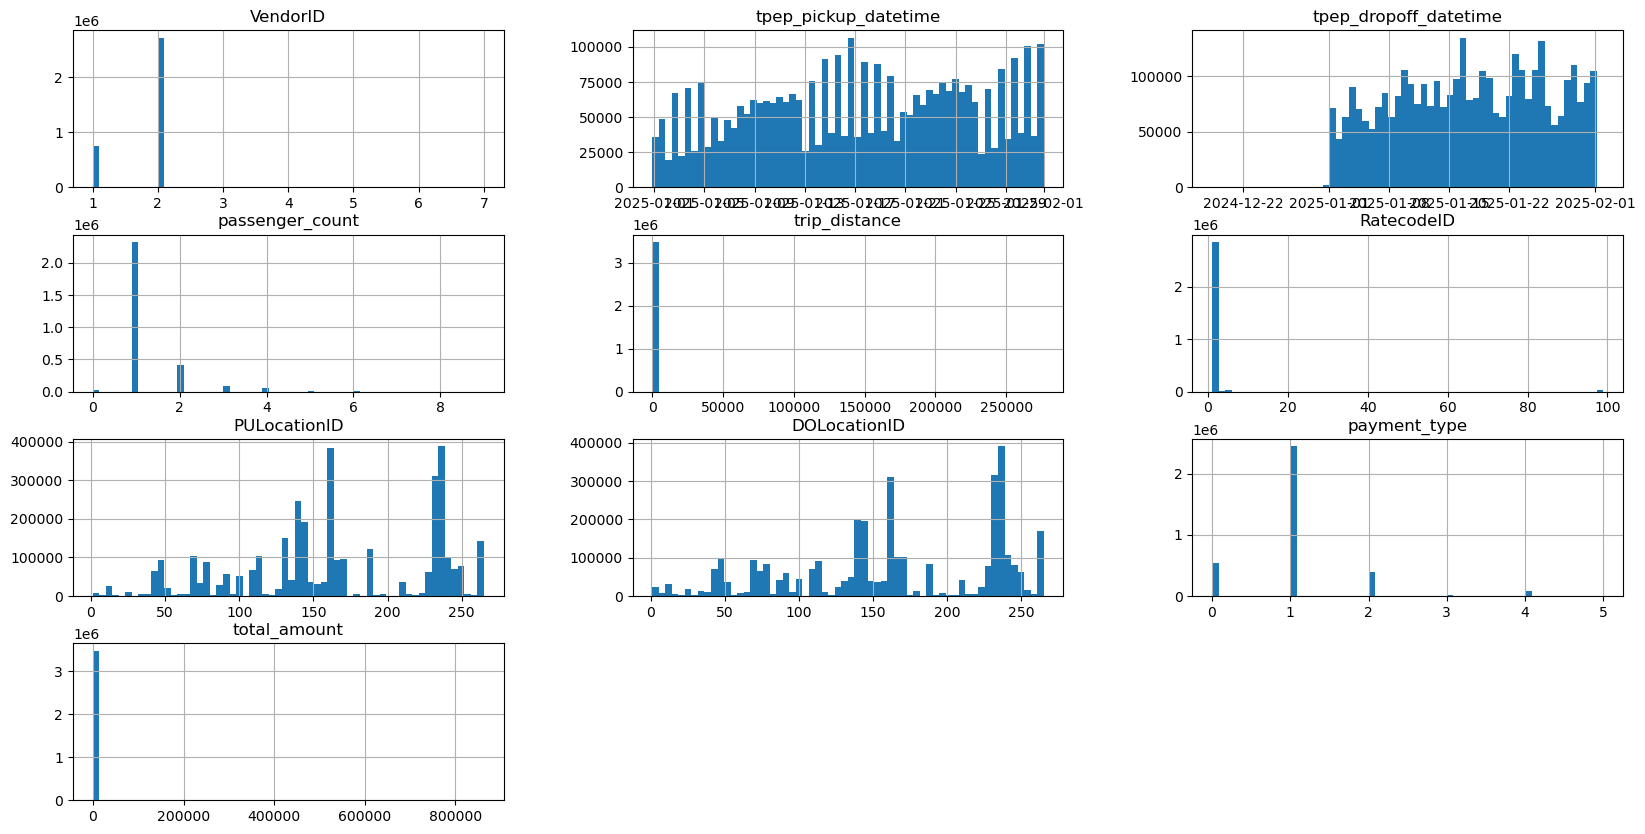

In [366]:
## Plotting using the Historgram
taxi_data.hist(figsize=(20,10), bins=60)

In [239]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     2756472
2.0       94420
99.0      41963
5.0       26501
3.0        8622
4.0        7092
6.0           7
Name: count, dtype: int64

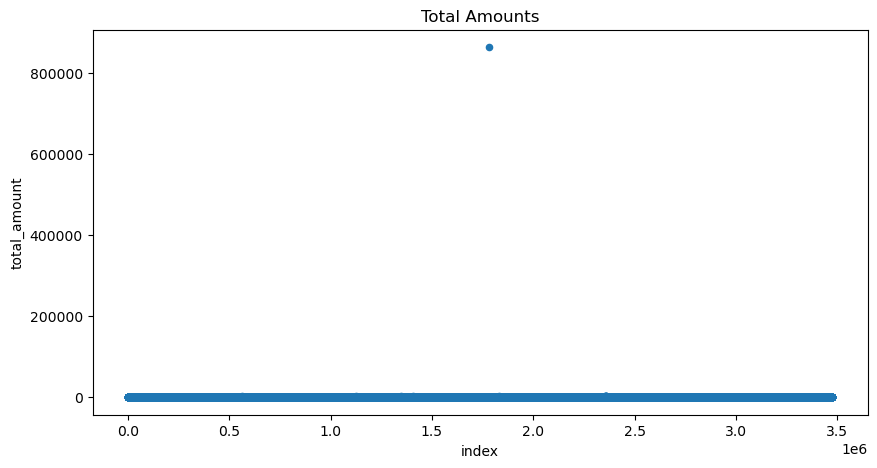

In [355]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
plt.title("Total Amounts")
plt.show()

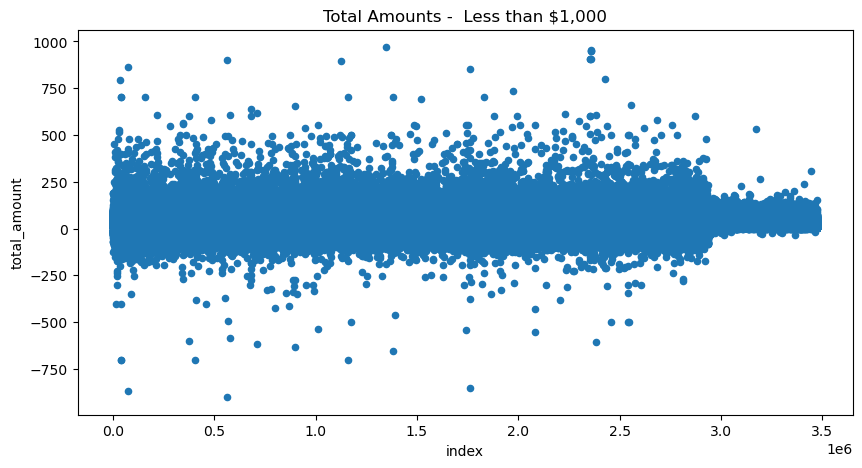

In [358]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
plt.title("Total Amounts -  Less than $1,000")
plt.show()

In [368]:
## Printing the negative values 
print(taxi_data[taxi_data['total_amount']<0].shape)

(63037, 10)


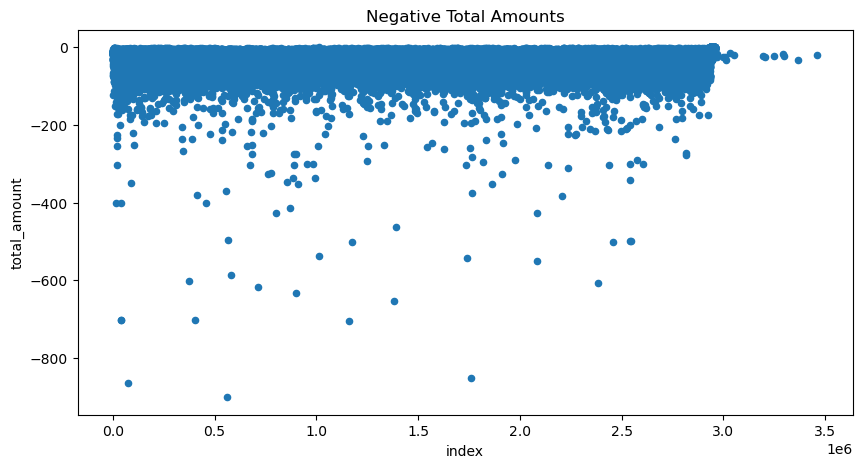

In [370]:
##
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
plt.title("Negative Total Amounts")
plt.show()

In [126]:
taxi_data[taxi_data['total_amount']<0].head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
17,2025-01-01 00:01:41,2025-01-01 00:07:14,1.0,0.71,1.0,79,107,2,-8.54
22,2025-01-01 00:55:54,2025-01-01 01:00:38,1.0,0.69,1.0,137,233,4,-11.50
104,2025-01-01 00:56:12,2025-01-01 01:15:00,1.0,0.97,1.0,161,170,4,-21.30
149,2025-01-01 00:55:53,2025-01-01 01:06:49,1.0,1.42,1.0,79,45,2,-17.10
202,2025-01-01 00:29:35,2025-01-01 00:36:02,1.0,0.60,1.0,79,148,4,-12.20
212,2025-01-01 00:11:44,2025-01-01 00:25:41,2.0,1.88,1.0,79,161,4,-19.20
364,2025-01-01 00:11:58,2025-01-01 00:12:31,1.0,0.01,1.0,42,42,4,-5.50
400,2025-01-01 00:09:58,2025-01-01 00:14:28,1.0,0.60,1.0,140,263,2,-11.50
492,2025-01-01 00:50:13,2025-01-01 01:11:20,1.0,3.84,1.0,48,151,2,-29.00
640,2025-01-01 00:51:05,2025-01-01 00:54:12,1.0,0.92,1.0,142,239,2,-11.50


In [372]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
4    37410
2    14111
3     8080
0     3421
1       15
Name: count, dtype: int64

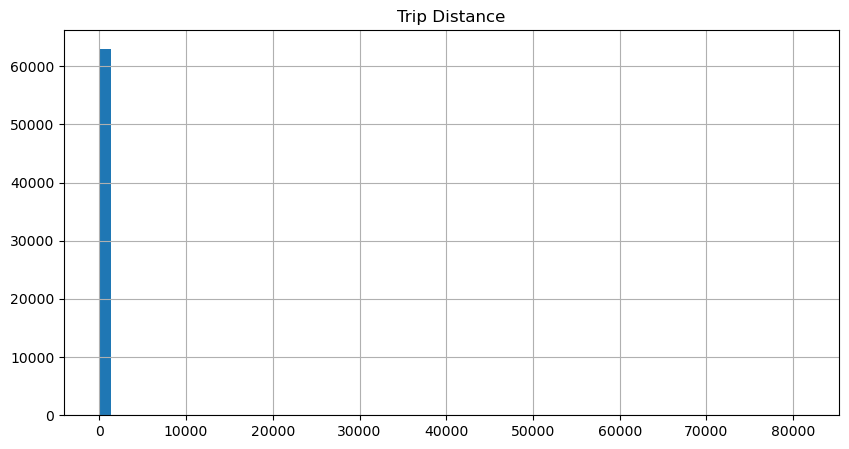

In [376]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))
plt.title("Trip Distance")
plt.show()

In [134]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(559, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
10261,2025-01-01 01:30:13,2025-01-01 01:30:31,1.0,0.00,1.0,226,226,2,0.0
18189,2025-01-01 03:57:21,2025-01-01 04:02:26,1.0,0.40,1.0,158,125,3,0.0
19155,2025-01-01 03:27:25,2025-01-01 03:43:43,1.0,3.50,1.0,144,163,4,0.0
21300,2025-01-01 04:03:25,2025-01-01 04:11:42,2.0,4.69,1.0,255,97,2,0.0
21920,2025-01-01 04:24:55,2025-01-01 04:29:57,4.0,1.72,1.0,7,7,2,0.0


In [138]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

payment_type
4    238
3    155
1     78
0     47
2     40
5      1
Name: count, dtype: int64

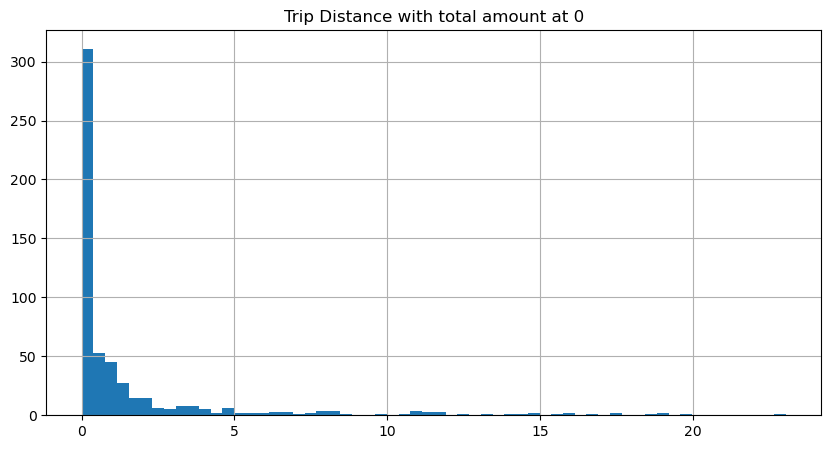

In [384]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,5))
plt.title("Trip Distance with total amount at 0")
plt.show()

In [386]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     262
0.10      19
0.50      17
0.40      15
0.30      14
        ... 
1.46       1
6.60       1
1.72       1
1.45       1
14.68      1
Name: count, Length: 112, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

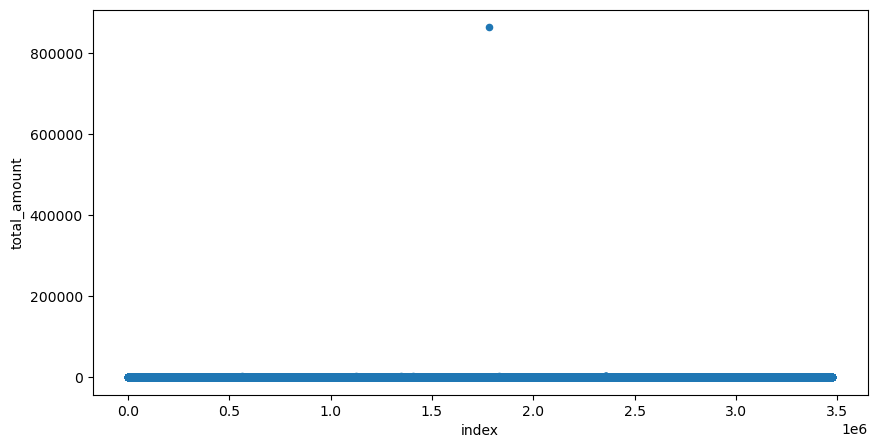

In [388]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [389]:
taxi_data[taxi_data['total_amount']>200].shape

(1913, 10)

In [390]:
taxi_data['total_amount'].mean()

25.61129169728817

## 4.Data Cleaning

In [395]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>=0)&(taxi_data['total_amount']<200)]

In [397]:
print(taxi_data.shape)
taxi_data_filtered.shape

(3475226, 10)


(3410271, 10)

In [399]:
taxi_data_filtered.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          536722
trip_distance                 0
RatecodeID               536722
PULocationID                  0
DOLocationID                  0
payment_type                  0
total_amount                  0
dtype: int64